predictive maintaince using  machine learning classification

# 1.Importing necessary libraries for dataset operations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading Dataset

In [ ]:

df=pd.read_csv('/content/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [ ]:
result = pd.concat([df.head(), df.tail()])
result

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.size

100000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
# Numerical features
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# categorical feature
df.describe(include="O")


,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [ ]:
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8419,8420,L55599,L,299.0,310.3,1431,39.9,157,0,No Failure
9985,9986,H39399,H,298.7,308.5,1572,35.6,202,0,No Failure
8690,8691,L55870,L,297.1,308.5,1323,44.4,207,1,Tool Wear Failure
9388,9389,M24248,M,297.5,307.9,1544,37.9,136,0,No Failure
4624,4625,M19484,M,303.0,311.1,1428,39.8,181,0,No Failure


# 3.Data Prepocessing

In [ ]:
df.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking if there is null value
missing_values=df.isnull().sum()
missing_percentage=df.isnull().mean()*100
missing_df=pd.DataFrame({'Missing Values':missing_values,'Missing Percentage':missing_percentage})
missing_df

,Missing Values,Missing Percentage
UDI,0,0.0
Product ID,0,0.0
Type,0,0.0
Air temperature [K],0,0.0
Process temperature [K],0,0.0
Rotational speed [rpm],0,0.0
Torque [Nm],0,0.0
Tool wear [min],0,0.0
Target,0,0.0
Failure Type,0,0.0


CHECKING DUPLICATED VALUES

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
df.describe().style.background_gradient(cmap="magma")

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.750000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.500000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.250000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


EXPLORATORY DATA ANALYSIS

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.drop('UDI',axis=1)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


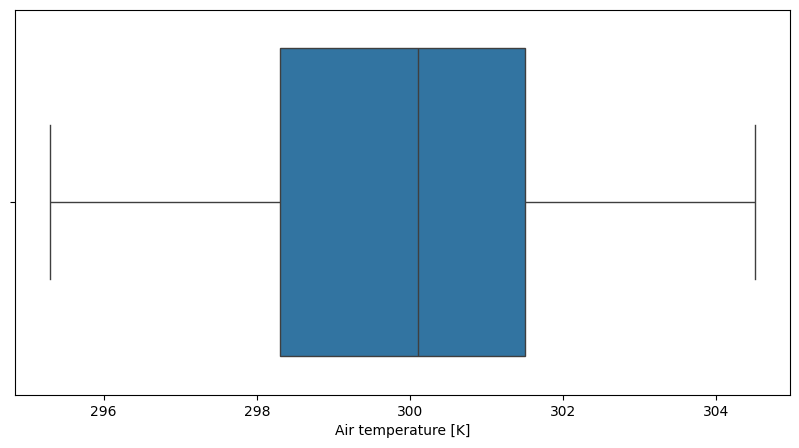

In [ ]:
#outliers handling box plot
plt.figure(figsize=(10,5))
sns.boxplot(x='Air temperature [K]',data=df)
plt.show()

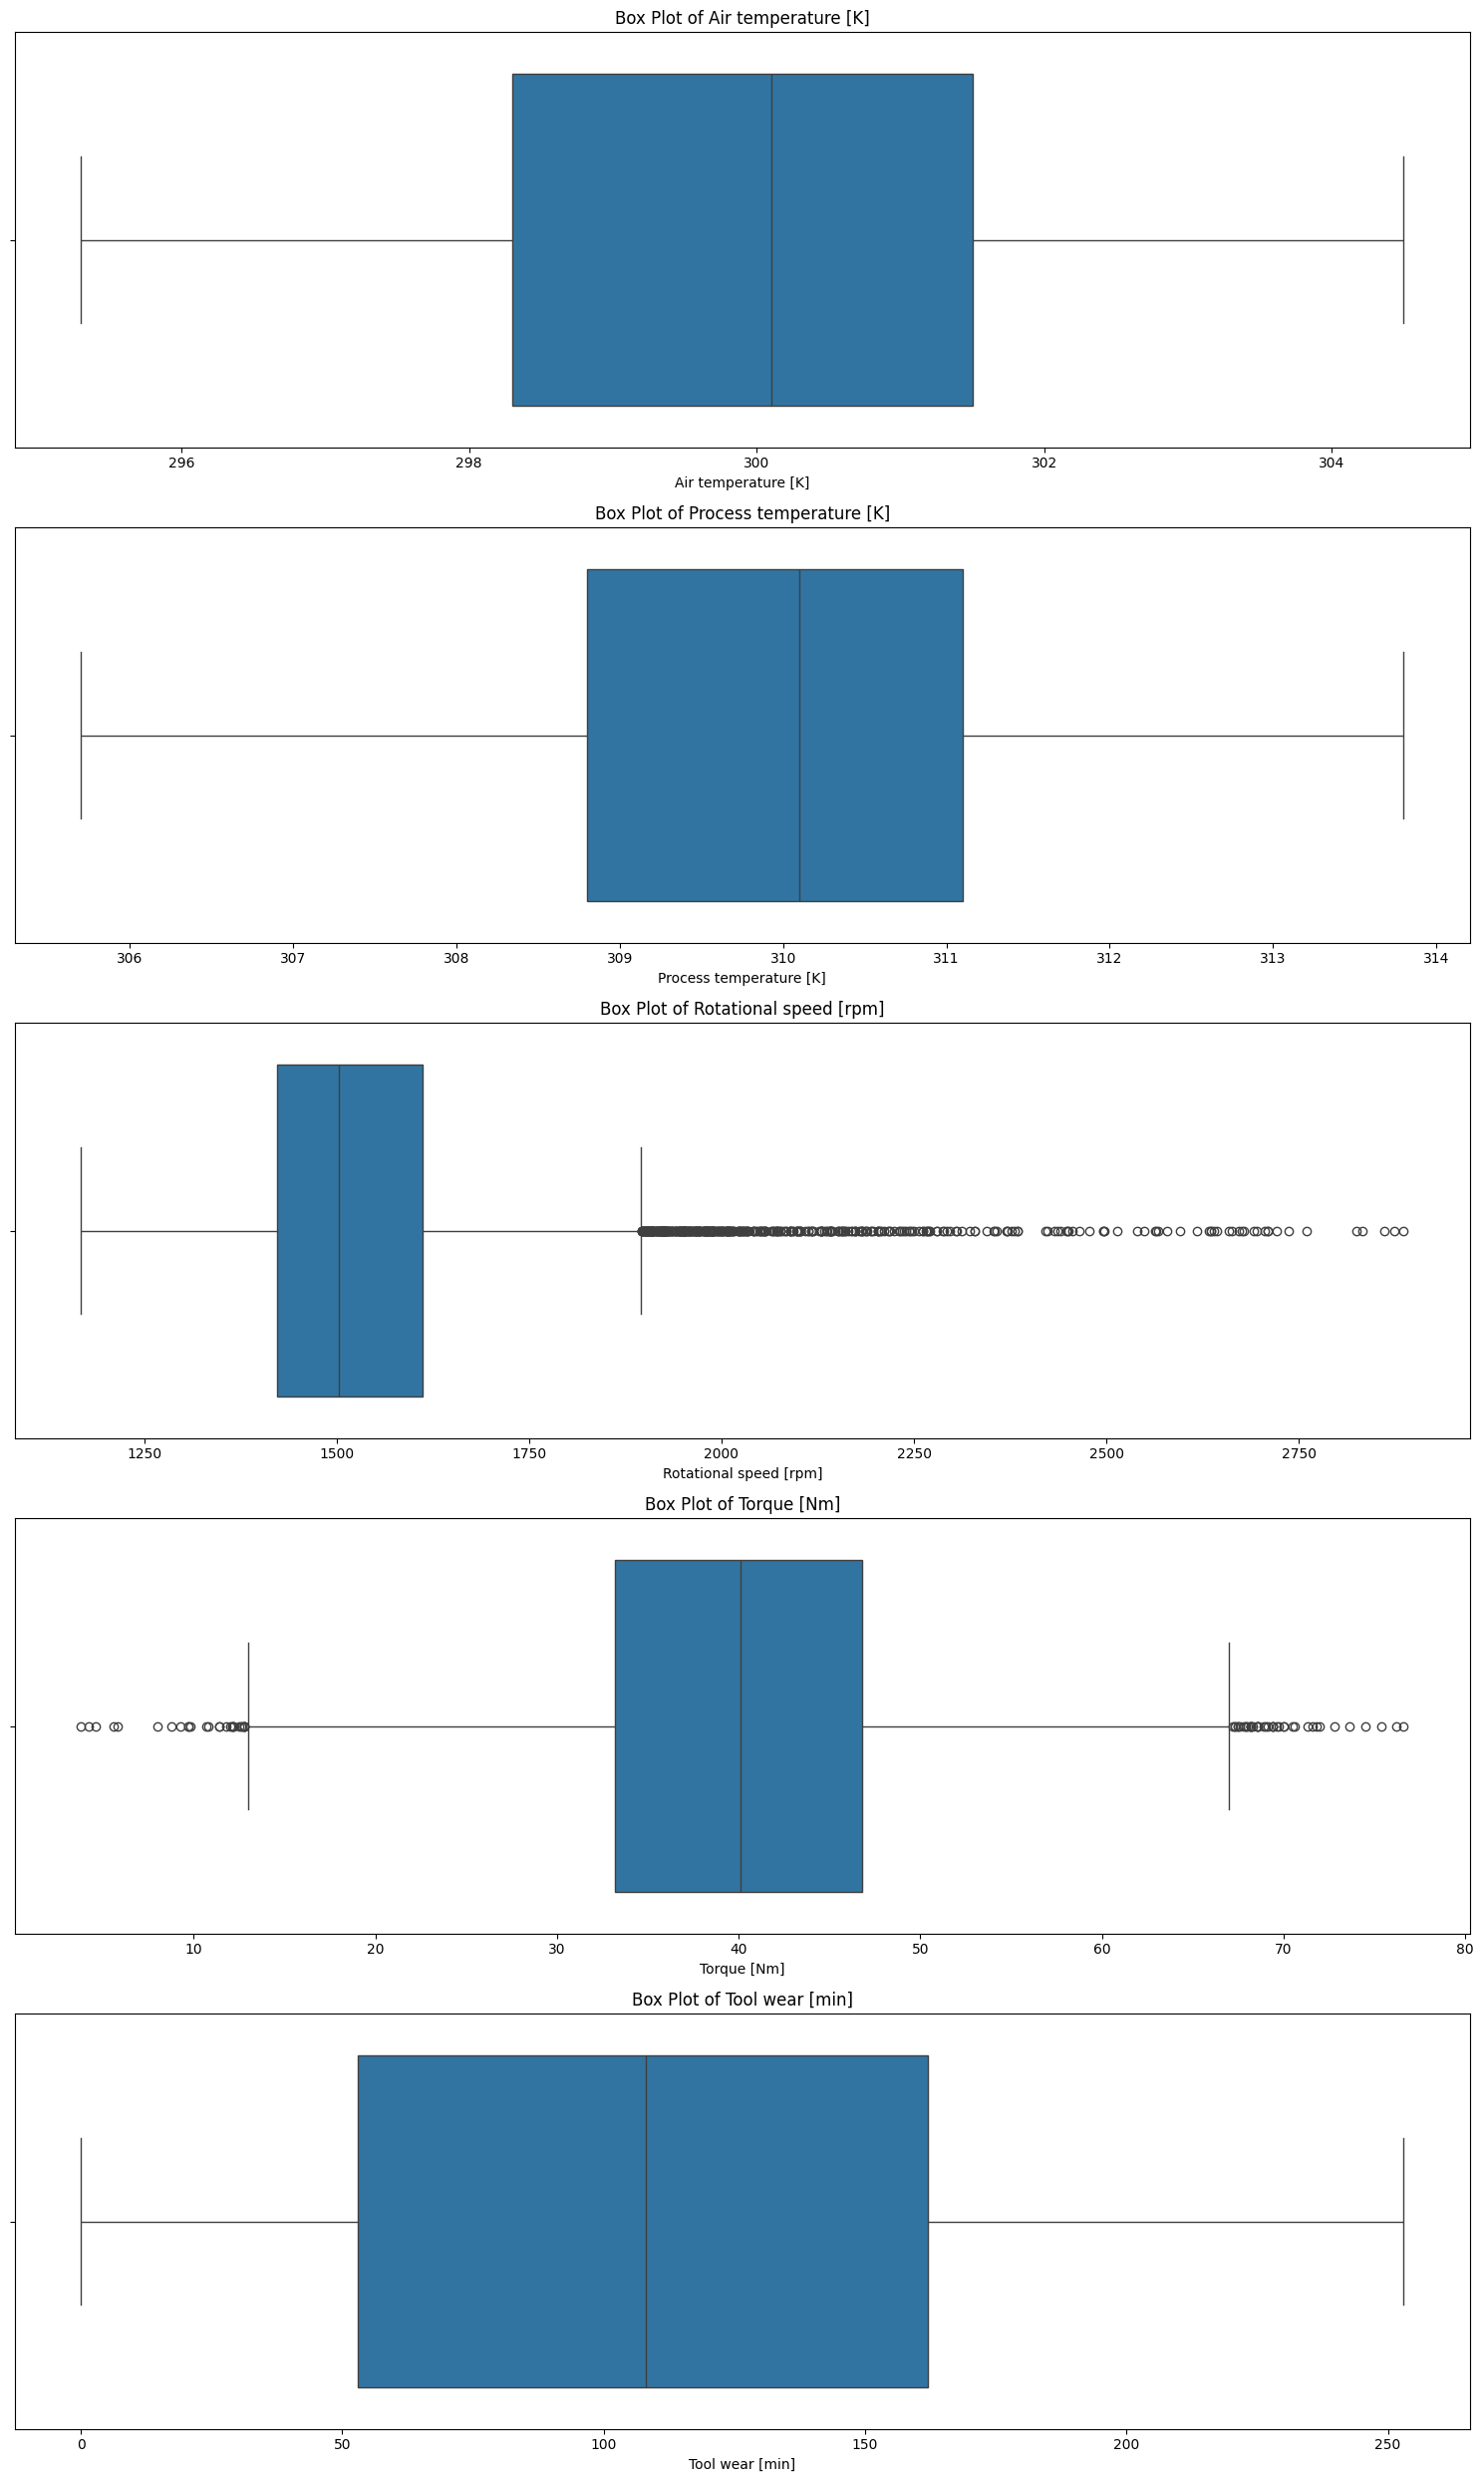

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, columns):
    """
    Function to plot box plots for the specified columns in the DataFrame.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    columns (list): List of columns for which to plot box plots.
    """
    plt.figure(figsize=(15, len(columns) * 5))  # Adjusting figure size
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        sns.boxplot(data=df, x=column)
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame and you want to plot box plots for specific columns
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plot_boxplots(df, columns_to_plot)


Hear we can see that only Torque and rotational speed has the outliers
but we dont worry about the outliers, because
if the rotational speed is more EMF of a machine is more it is usefull parameter of machine
Torque is also one most important parameter when we will travel to uphills so more torque is reuqired
we cant handle the outliers in this case

TEMPERATURE

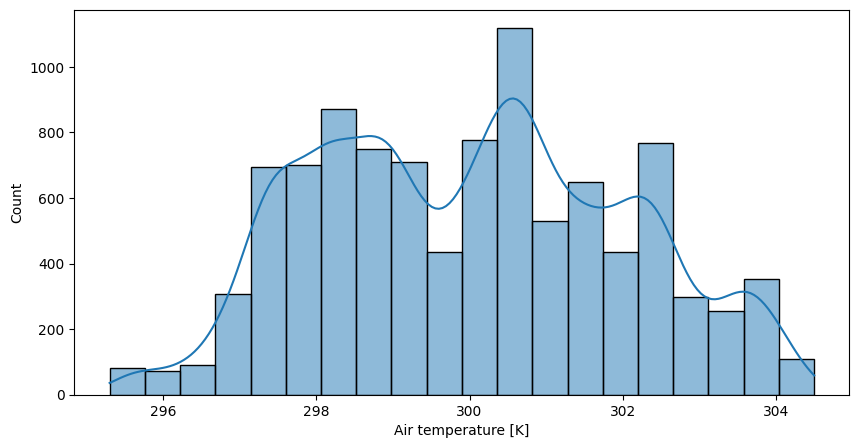

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(x='Air temperature [K]',data=df,bins=20,kde=True)
plt.show()

Air Temperature count is more at 300k

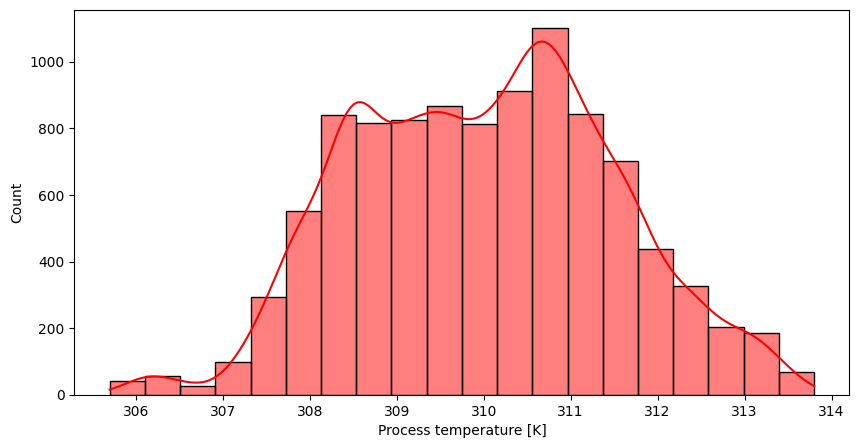

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Process temperature [K]',data=df,bins=20,kde=True,color='red')
plt.show()

process Temperature  of a particular vehicle is more at above 310k because it is more than room temperature every vehicle is manufactured above room room temperature

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (6, 3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()


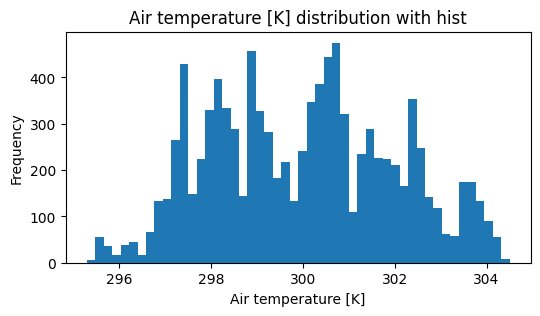

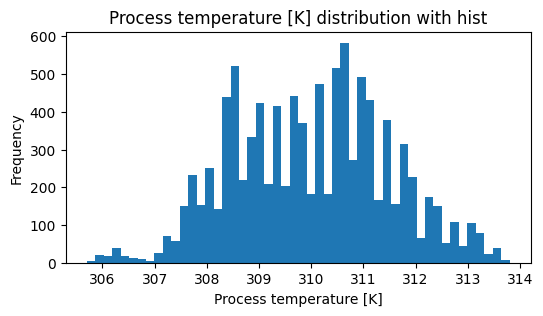

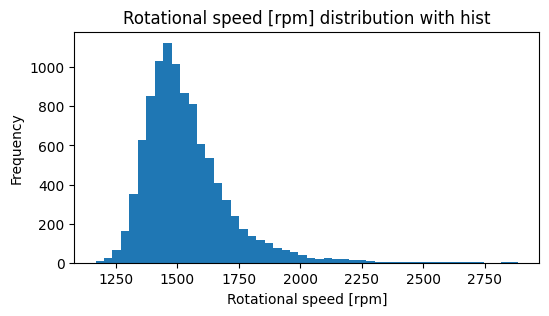

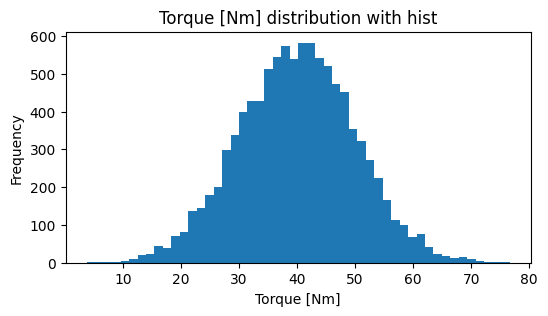

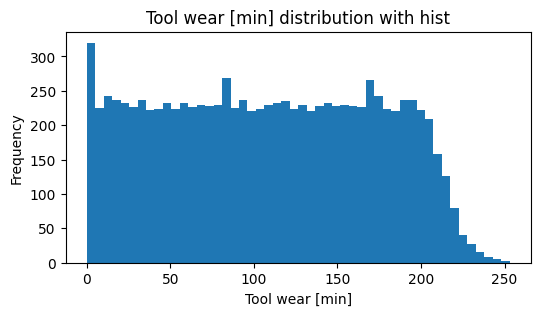

In [ ]:
colum=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
for col in colum:
  plot_hist(col)

TYPE

In [ ]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


 l-low(50% of all products)                                                                 m-medium (30%)                                                             h-high (20%)
 as product quality variants

<Axes: ylabel='count'>

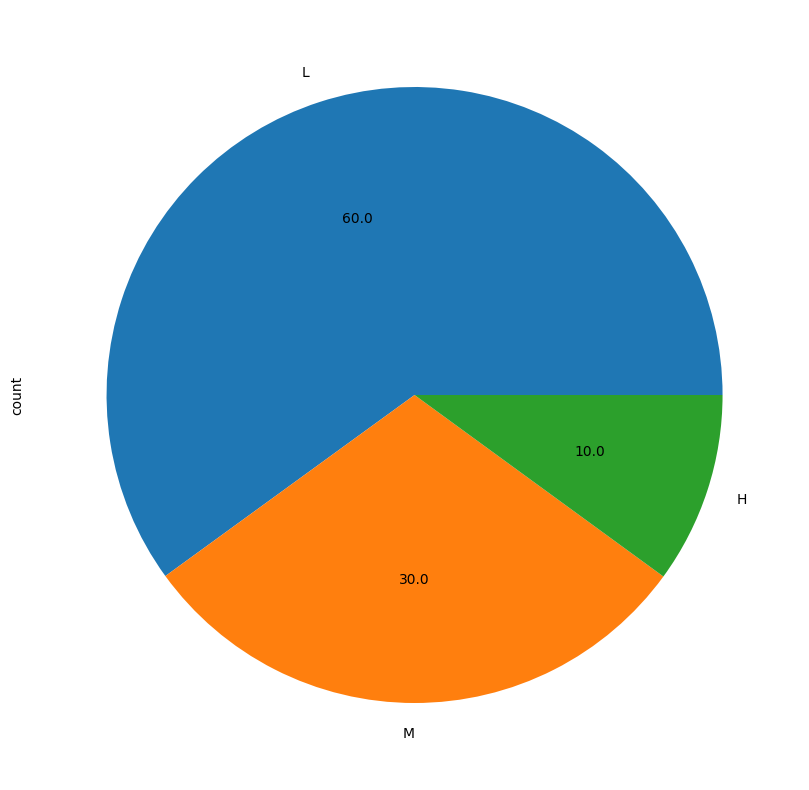

In [ ]:
df['Type'].value_counts().plot(kind='pie',autopct = '%.1f')

mostly category of vehicle is low in size

<Axes: xlabel='Type'>

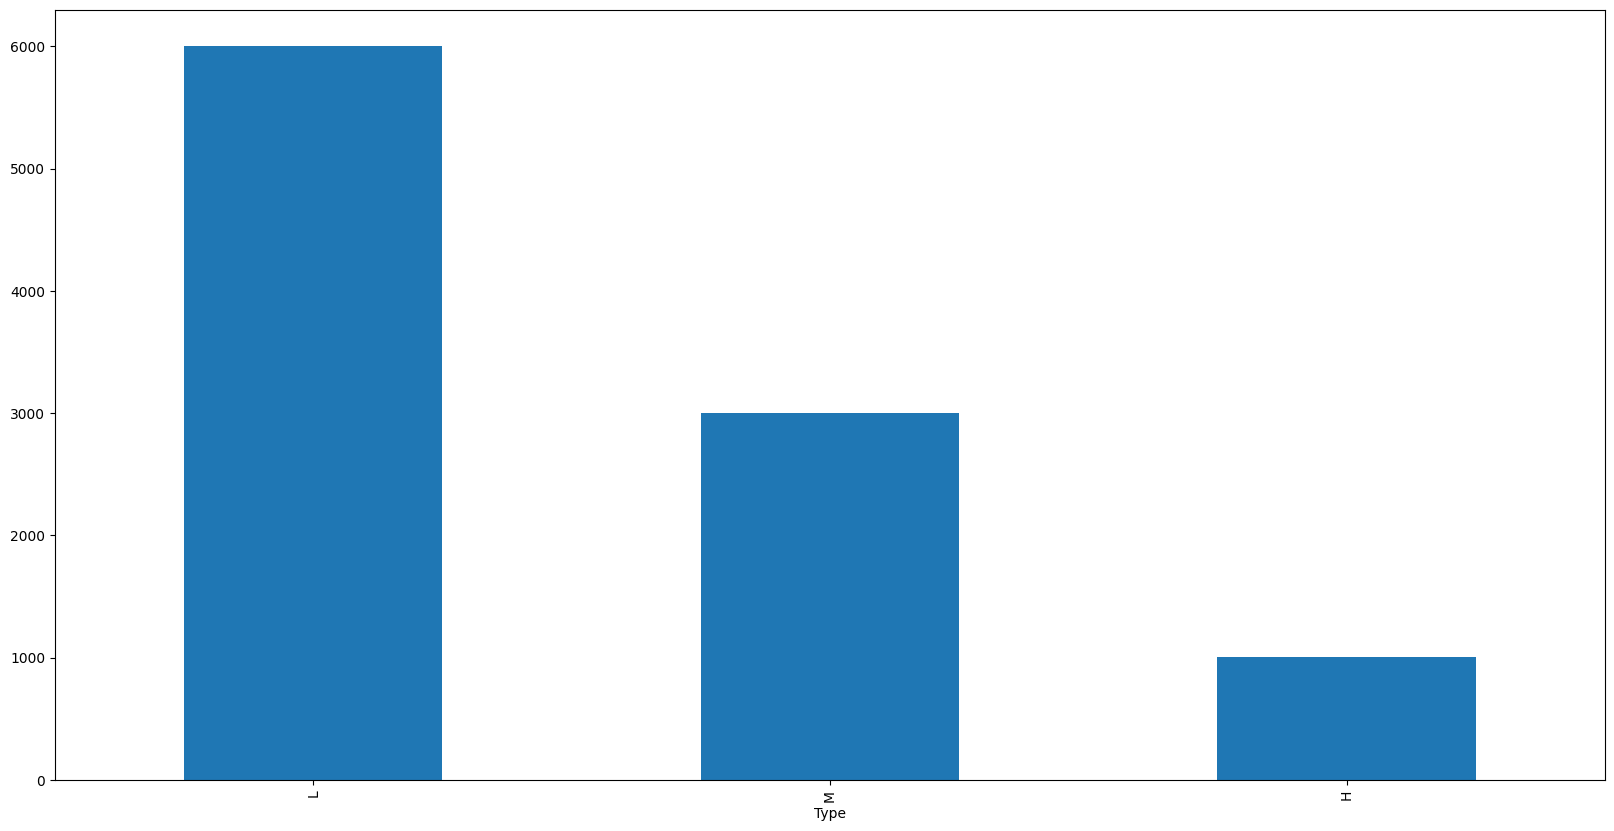

In [ ]:
df['Type'].value_counts().plot(kind='bar')

low category vehicle are nearly around 6000

In [ ]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

<ipython-input-199-c2d327cd73df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df1.values, y = df1.index, palette = 'magma')


<Axes: ylabel='Type'>

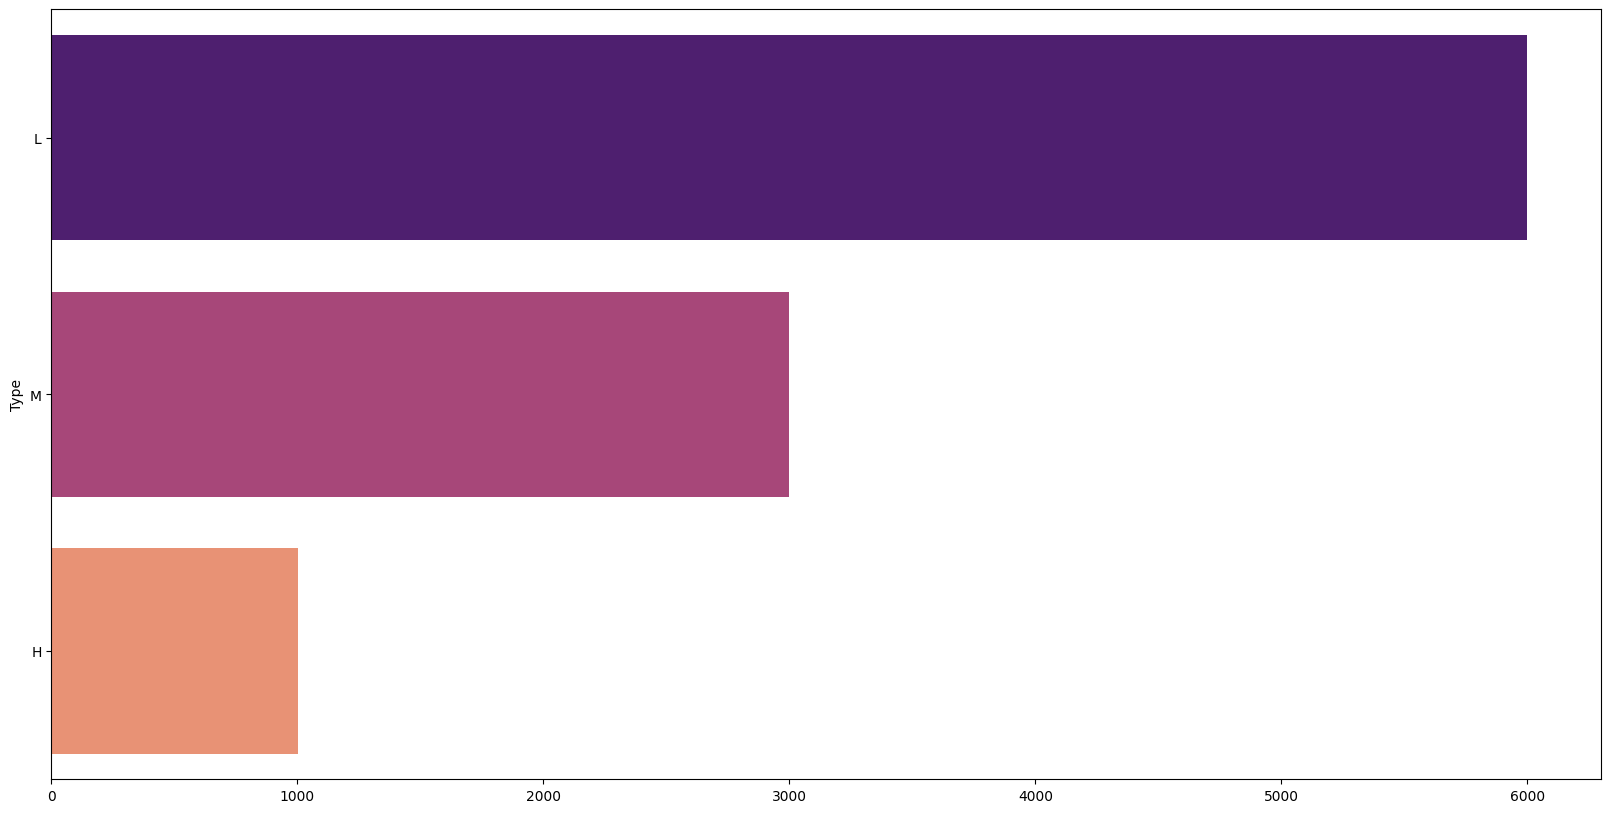

In [ ]:
df1 = df['Type'].value_counts()
sns.barplot(x = df1.values, y = df1.index, palette = 'magma')

l-low(50% of all products) m-medium (30%) h-high (20%) as product quality variants

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df['Failure Type'].value_counts()


,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


<Axes: xlabel='Type', ylabel='count'>

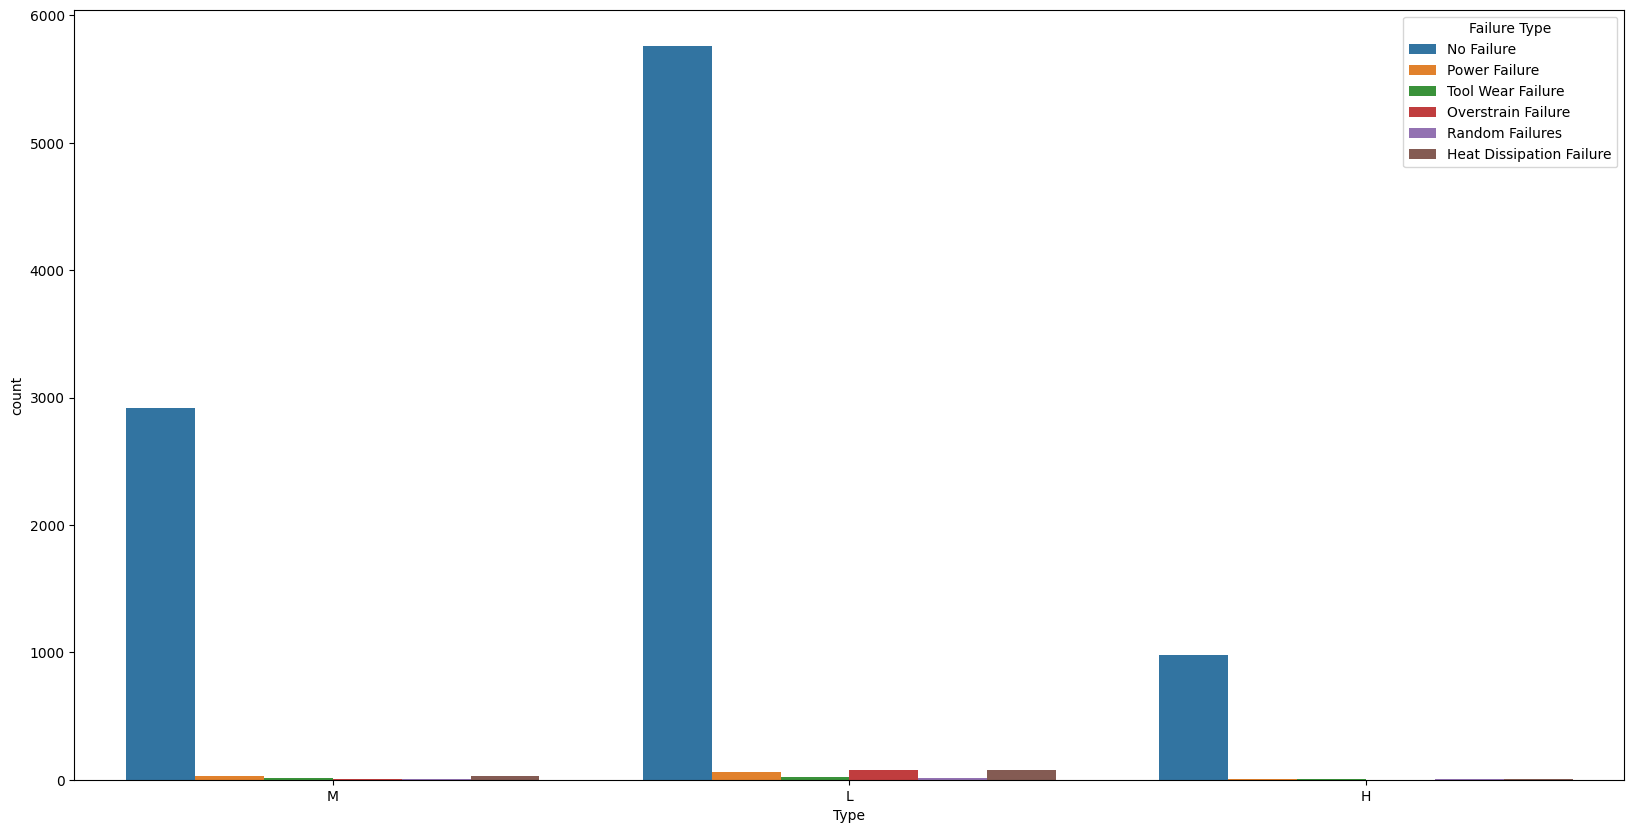

In [ ]:
sns.countplot(x='Type',hue='Failure Type',data=df)

 no Failure count is more comapred to other failures so mostly machine data is good

In [ ]:
df['Type'].unique()

In [ ]:
df1 = df['Type'].value_counts()
sns.barplot(x = df1.values, y = df1.index, palette = 'magma')


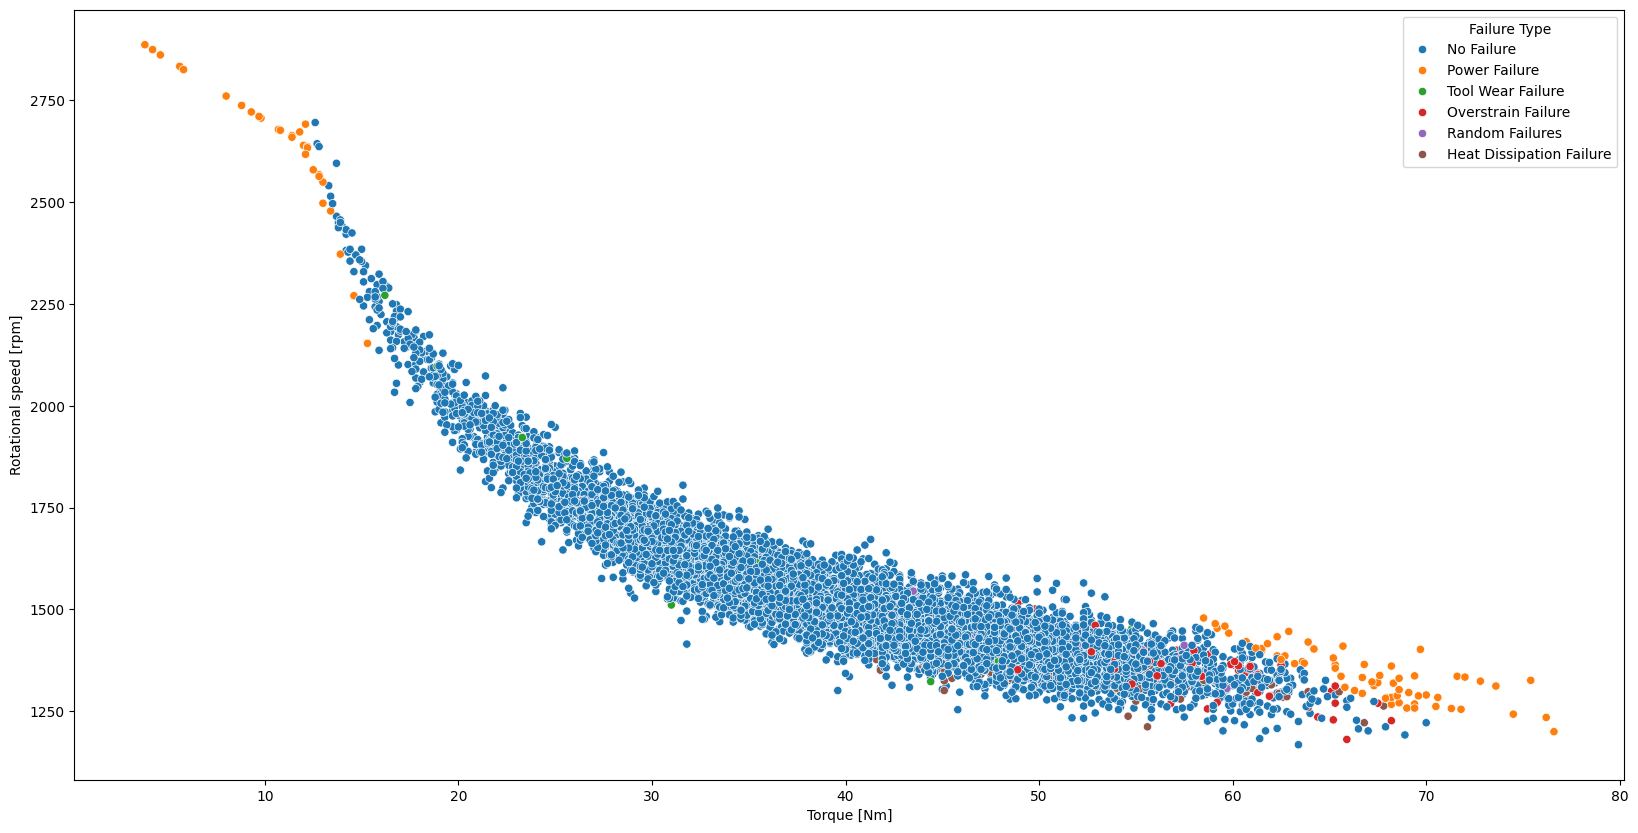

In [ ]:
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10");


if The torque is more or Torque is less in that region power failure occurs


<Axes: xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

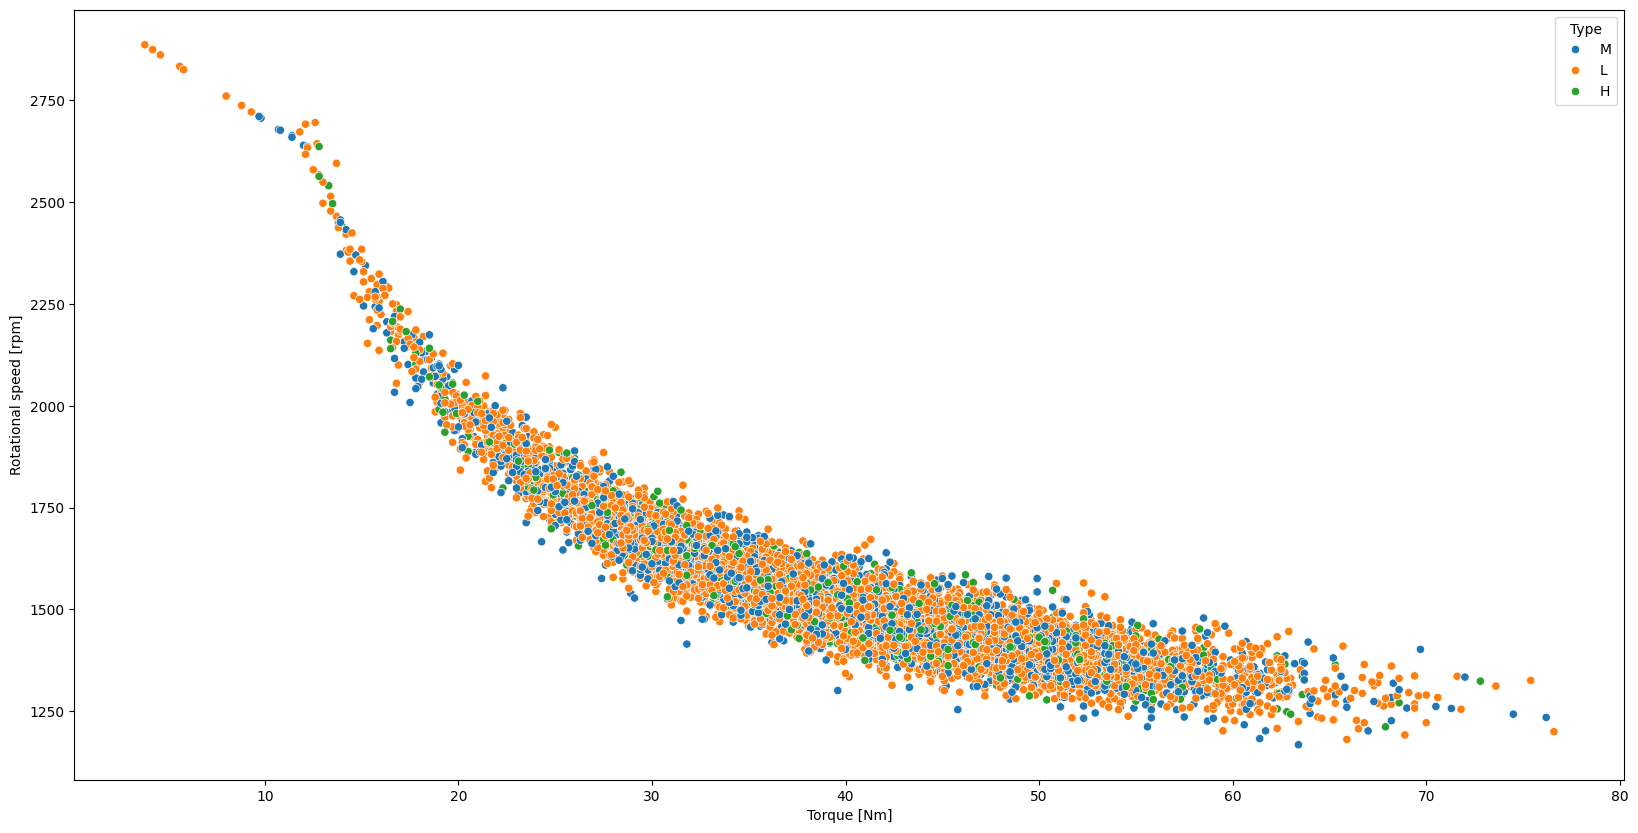

In [ ]:
sns.scatterplot(x='Torque [Nm]',y='Rotational speed [rpm]',data=df,hue='Type')

low sized products operates entire Torue because low in size it occupies entire area

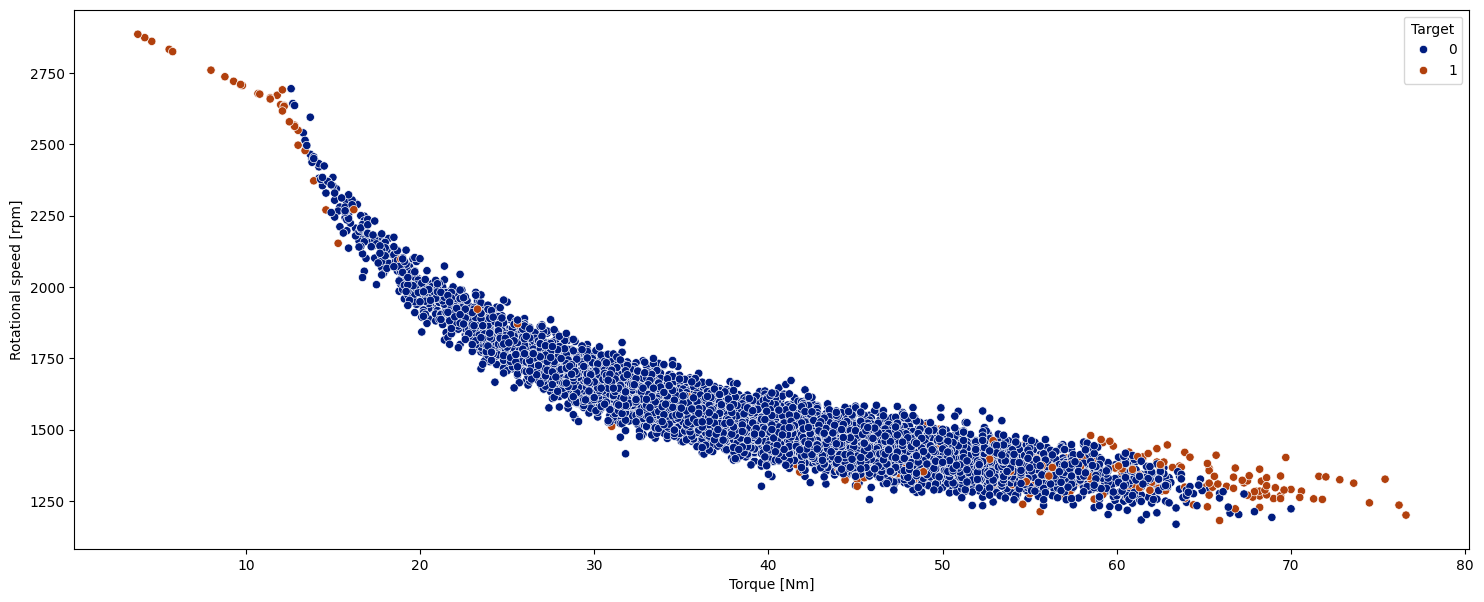

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="dark");


machine is ok between the Torques 15-60 it operates normally

Text(0.5, 1.0, 'Average Torque [Nm] for Each Failure Type')

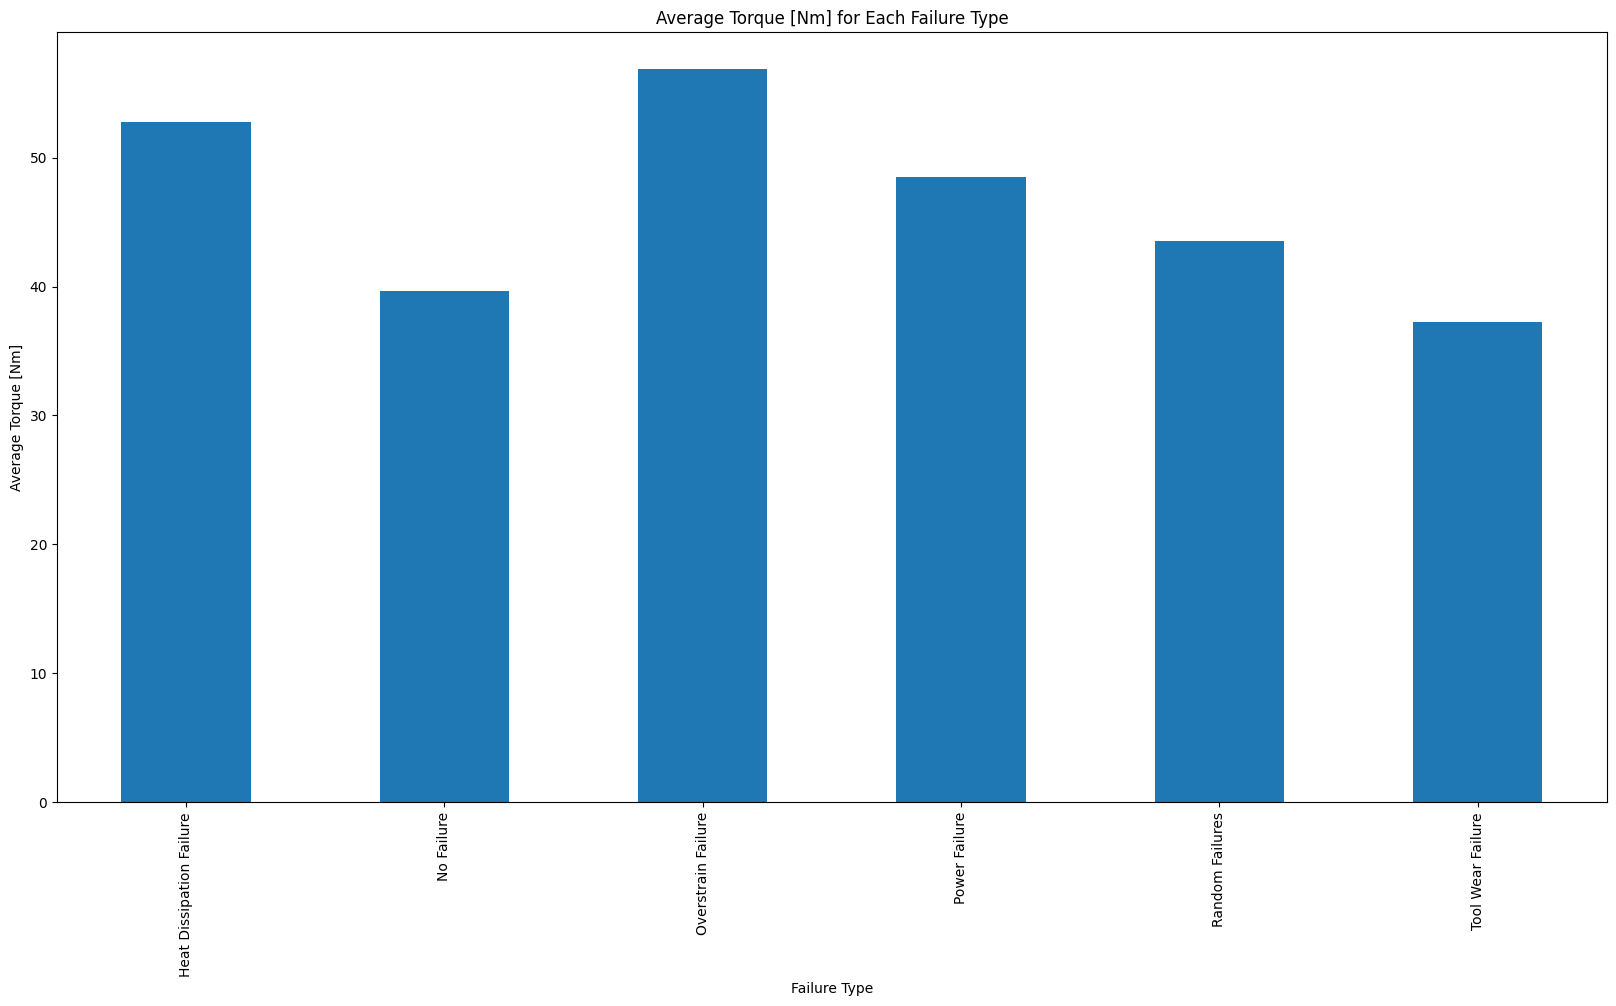

In [ ]:
#Calculate the average value for each unique failure type
avg=df.groupby('Failure Type')['Torque [Nm]'].mean()
avg.plot(kind='bar')
plt.xlabel('Failure Type')
plt.ylabel('Average Torque [Nm]')
plt.title('Average Torque [Nm] for Each Failure Type')

it shows relation between Torque vs failures if more Torque more heat dissipation failures occurs

In [ ]:
df['Target'].value_counts()

,count
Target,
0,9661
1,339


<Axes: ylabel='count'>

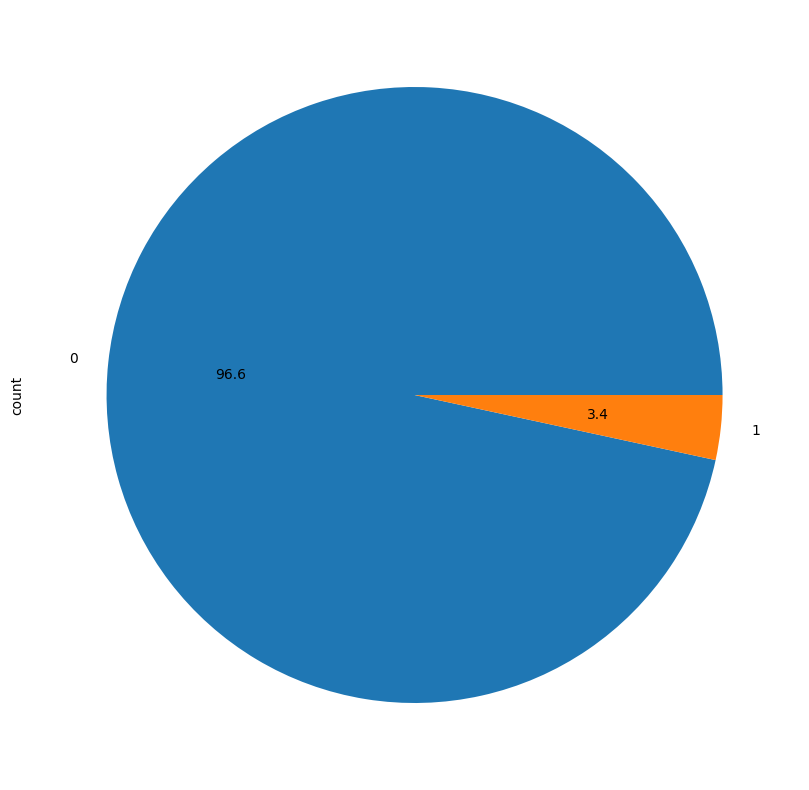

In [ ]:
df['Target'].value_counts().plot(kind='pie',autopct='%.1f')

0-machine is OK                                                                                                  
1-machine break

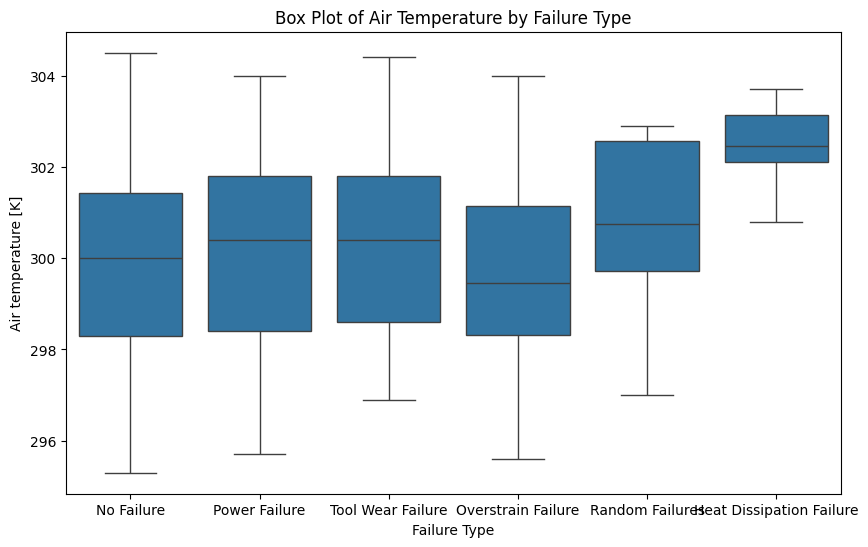

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Box Plot of Air Temperature by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Air temperature [K]')
plt.show()

There is no outliers in failure types as well as air temperature

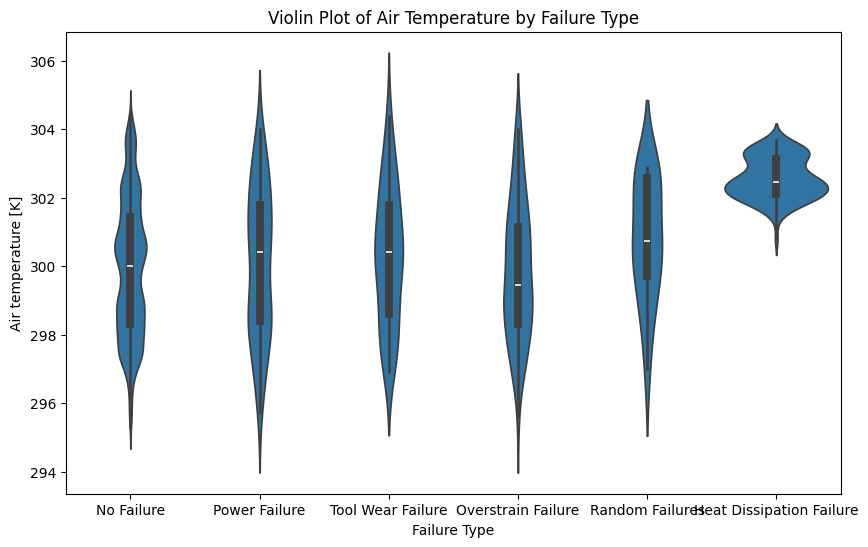

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Failure Type', y='Air temperature [K]')
plt.title('Violin Plot of Air Temperature by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Air temperature [K]')
plt.show()

it shows the distrubution of the failure type observe that failure is happen above  room temperature i.e 298k mostly failures happens due tempearture increases winding damages heat losses occurs eventually machine will come falure state

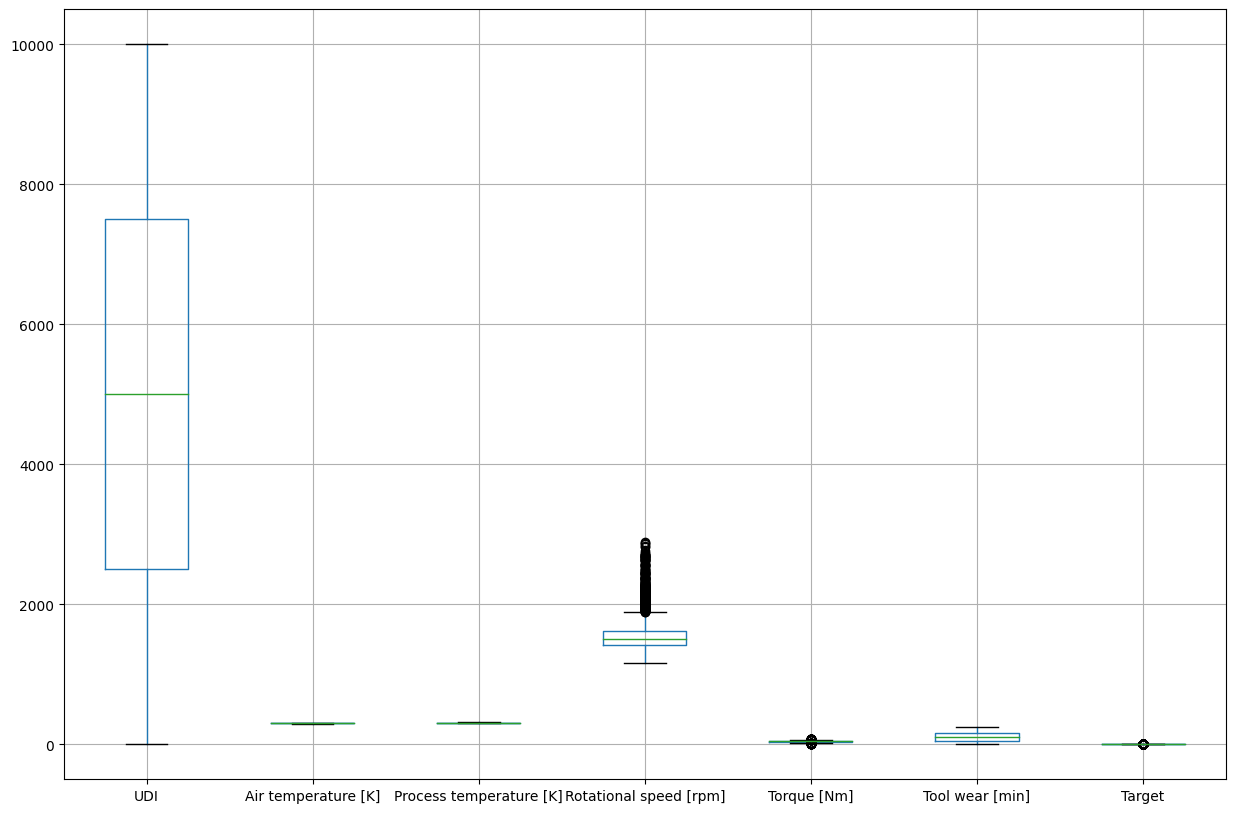

In [ ]:
df.boxplot(figsize=(15,10))
plt.show()

Here we can observe that only two features i.e Torque and Rotational speed has outliers

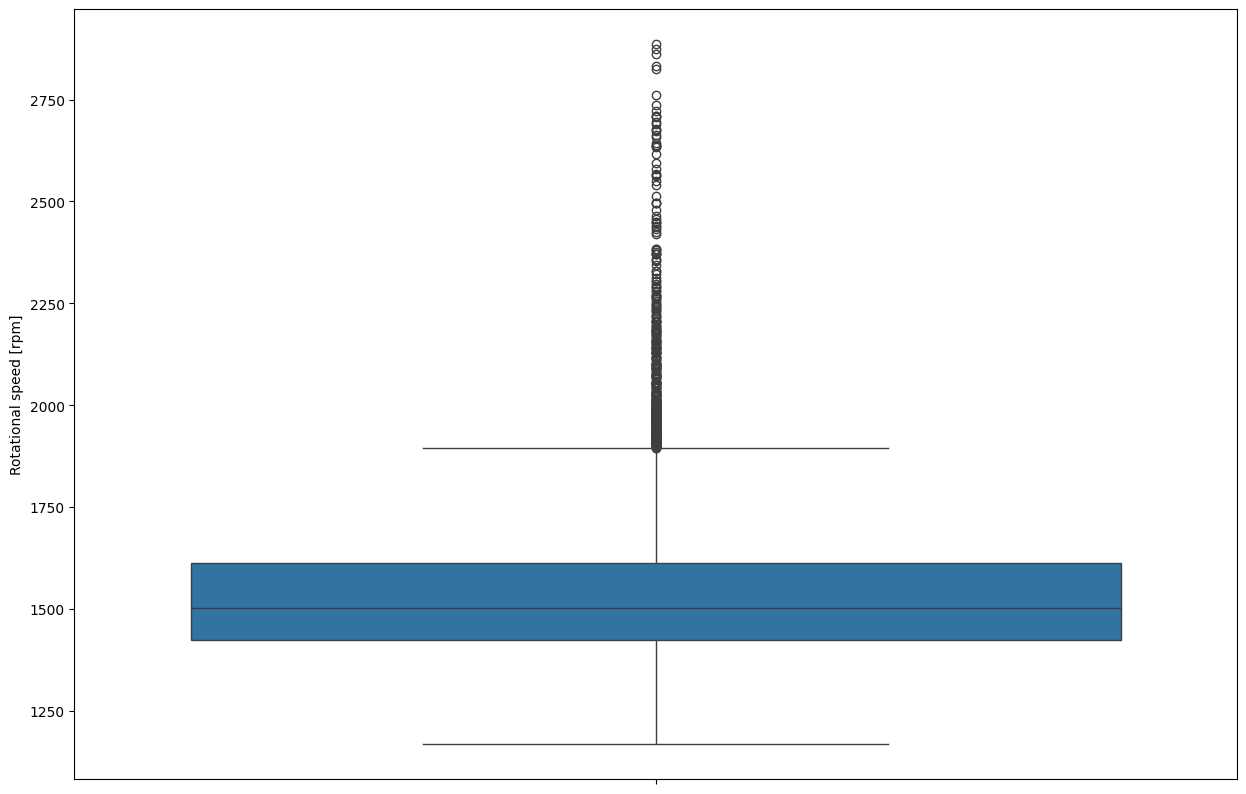

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df['Rotational speed [rpm]'])
plt.show()

it shows rotational speed has the outliers, no problems if the outliers are present in rotational speed, beacause rotational speed  helps for machines to increase EMF and performance

In [ ]:
corr = df.corr(numeric_only=True)
corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


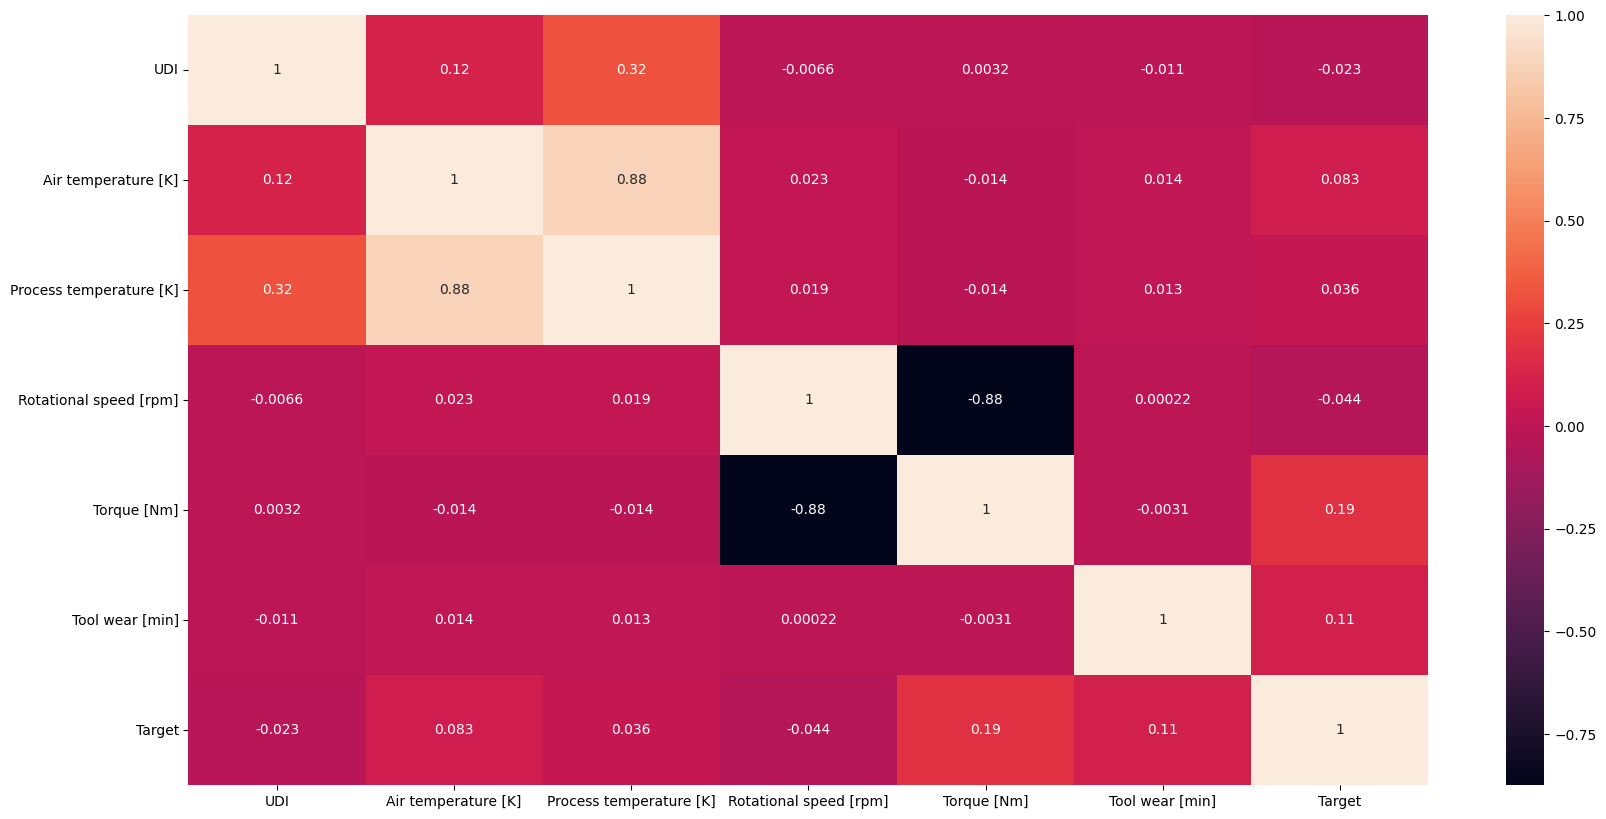

In [ ]:
sns.heatmap(corr, annot=True)
plt.show()

<Axes: >

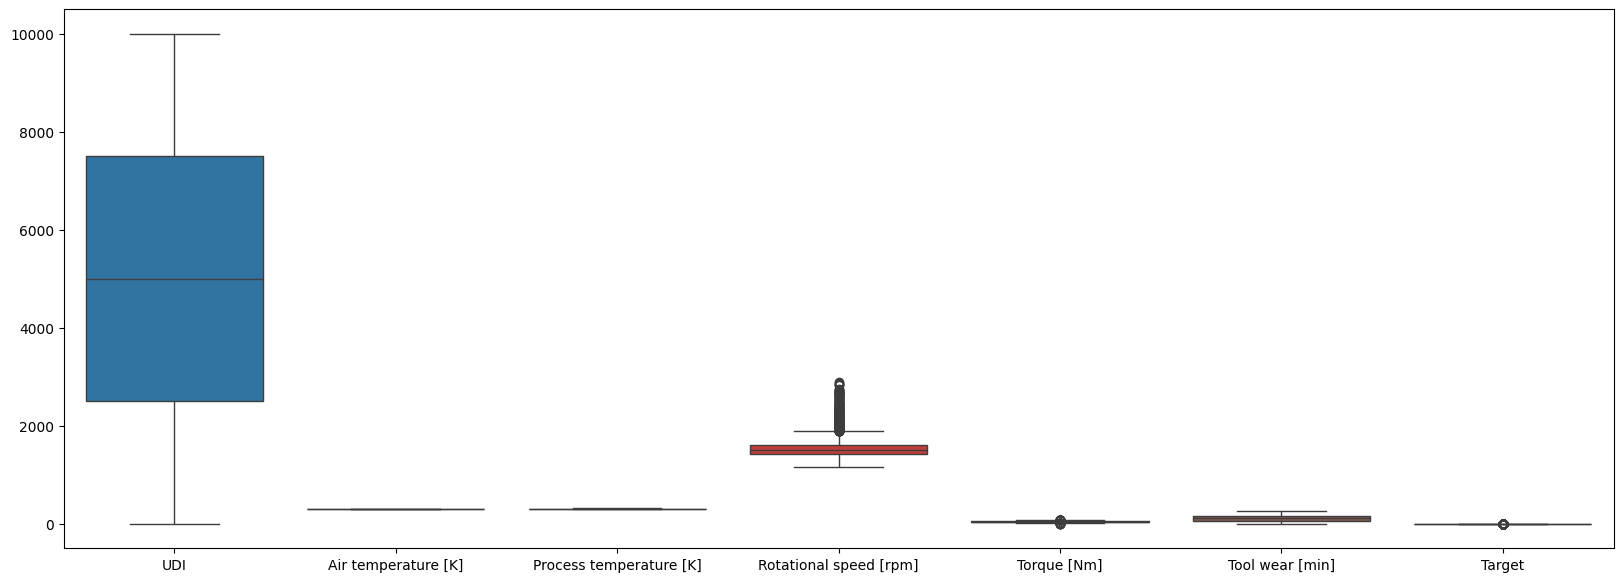

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df)


it shows Torque and Rotational speed has the outliers

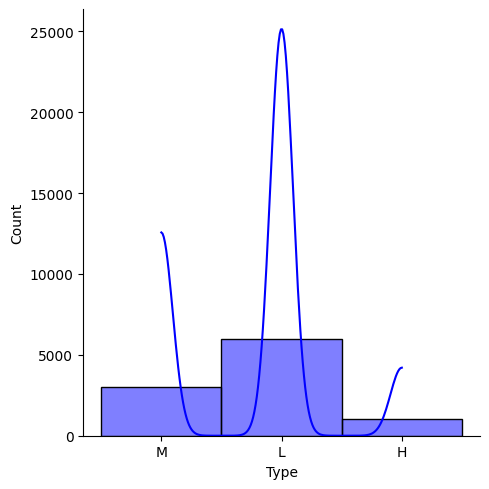

In [ ]:
sns.displot(data=df, x="Type", kde=True, bins = 100,color = "blue");


it shows that low most of the products are low quality products

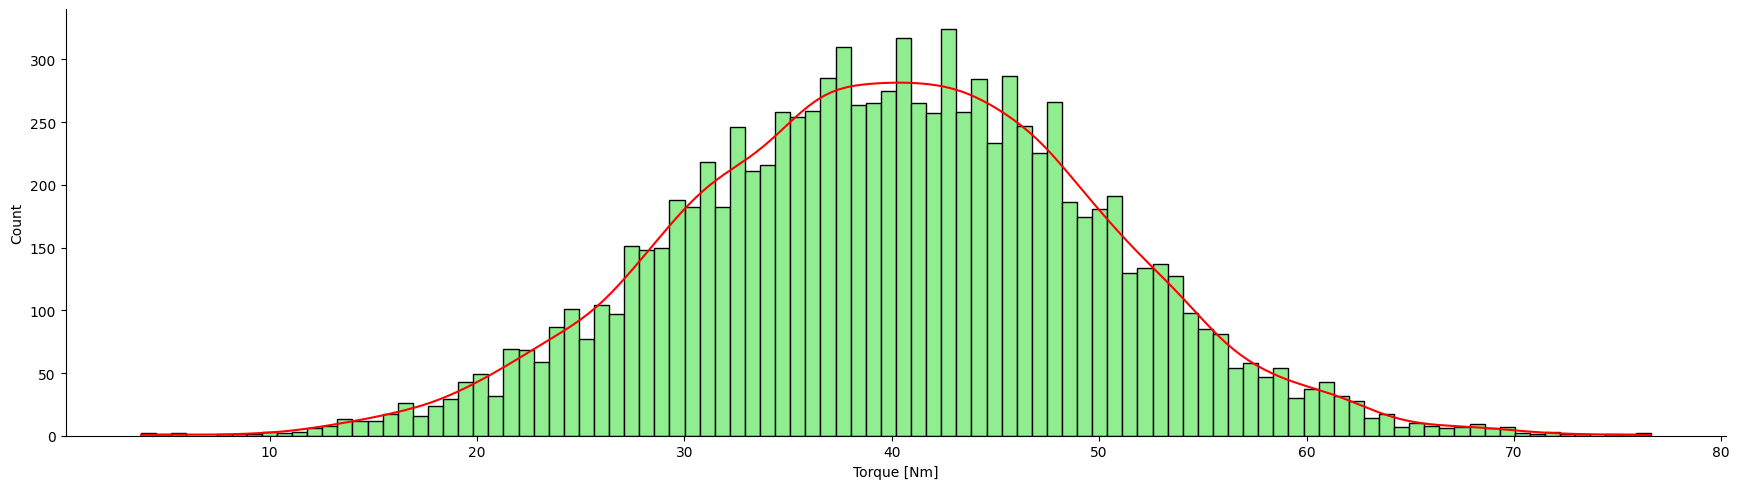

In [ ]:
sns.displot(data=df, x="Torque [Nm]", kde=True, bins = 100,color = "red", facecolor = "lightgreen",height = 5, aspect = 3.5);

mostly machine operates at Torque 40

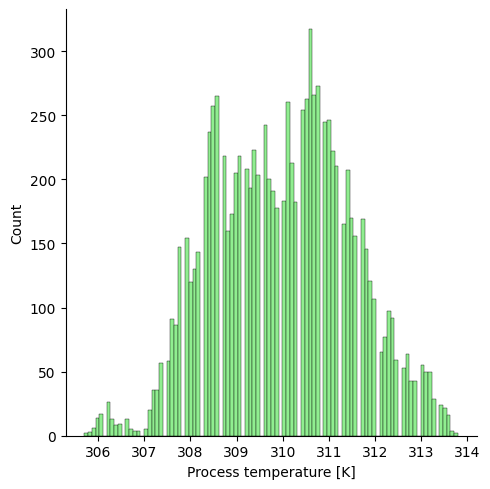

In [ ]:
sns.displot(data=df, x="Process temperature [K]", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5);

process of machine mostly happend at 35-40 c so i.e at 310 k

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

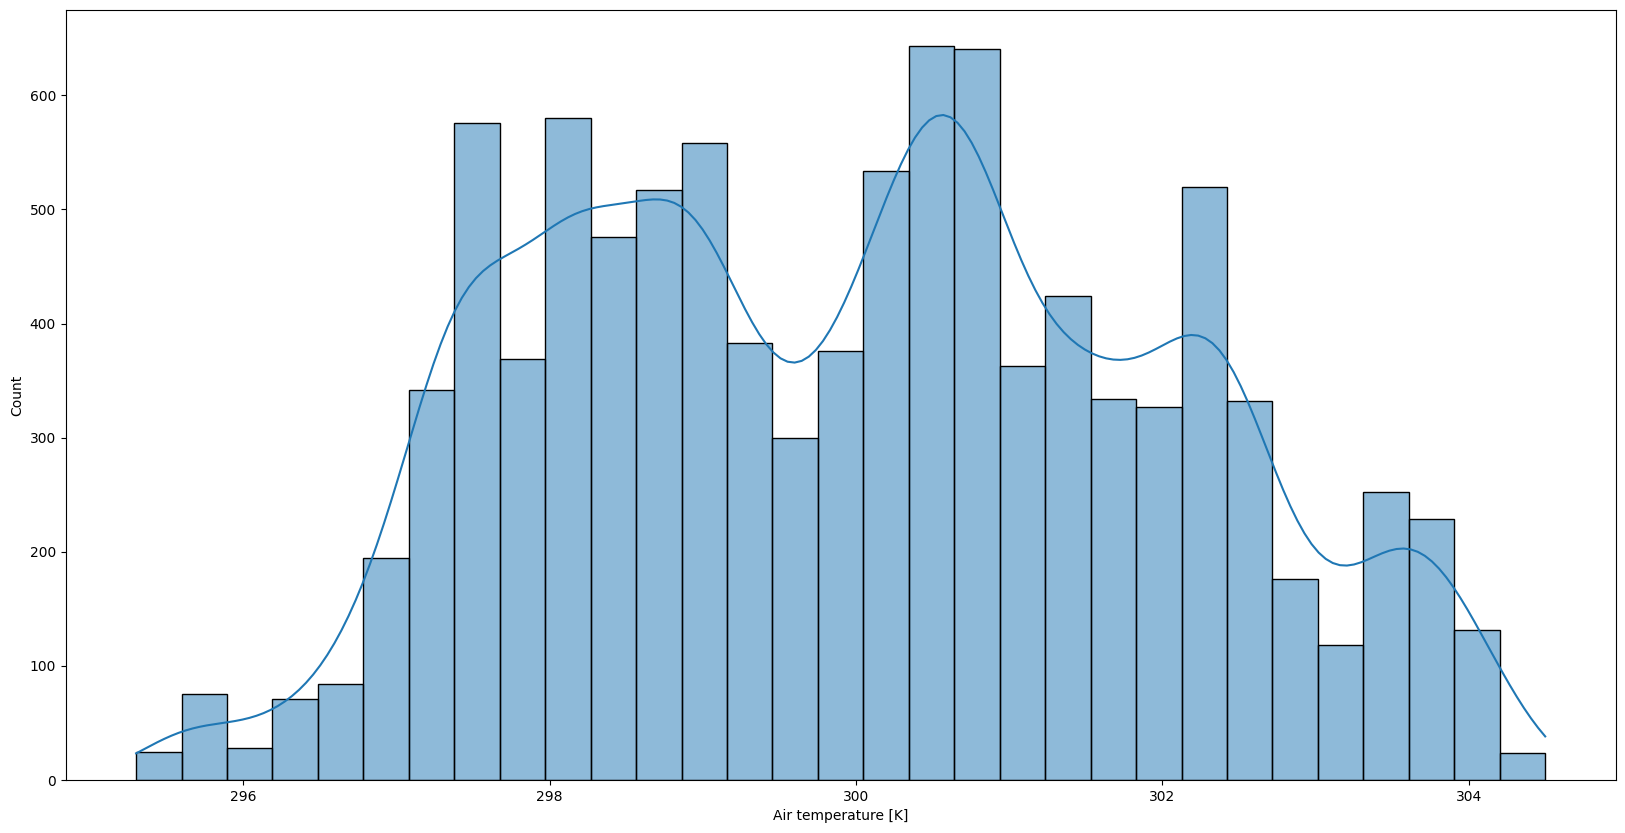

In [ ]:
sns.histplot(df['Air temperature [K]'], kde=True)

count of air tempeature is more at the room tempearture 298k later it increases at 305k

<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

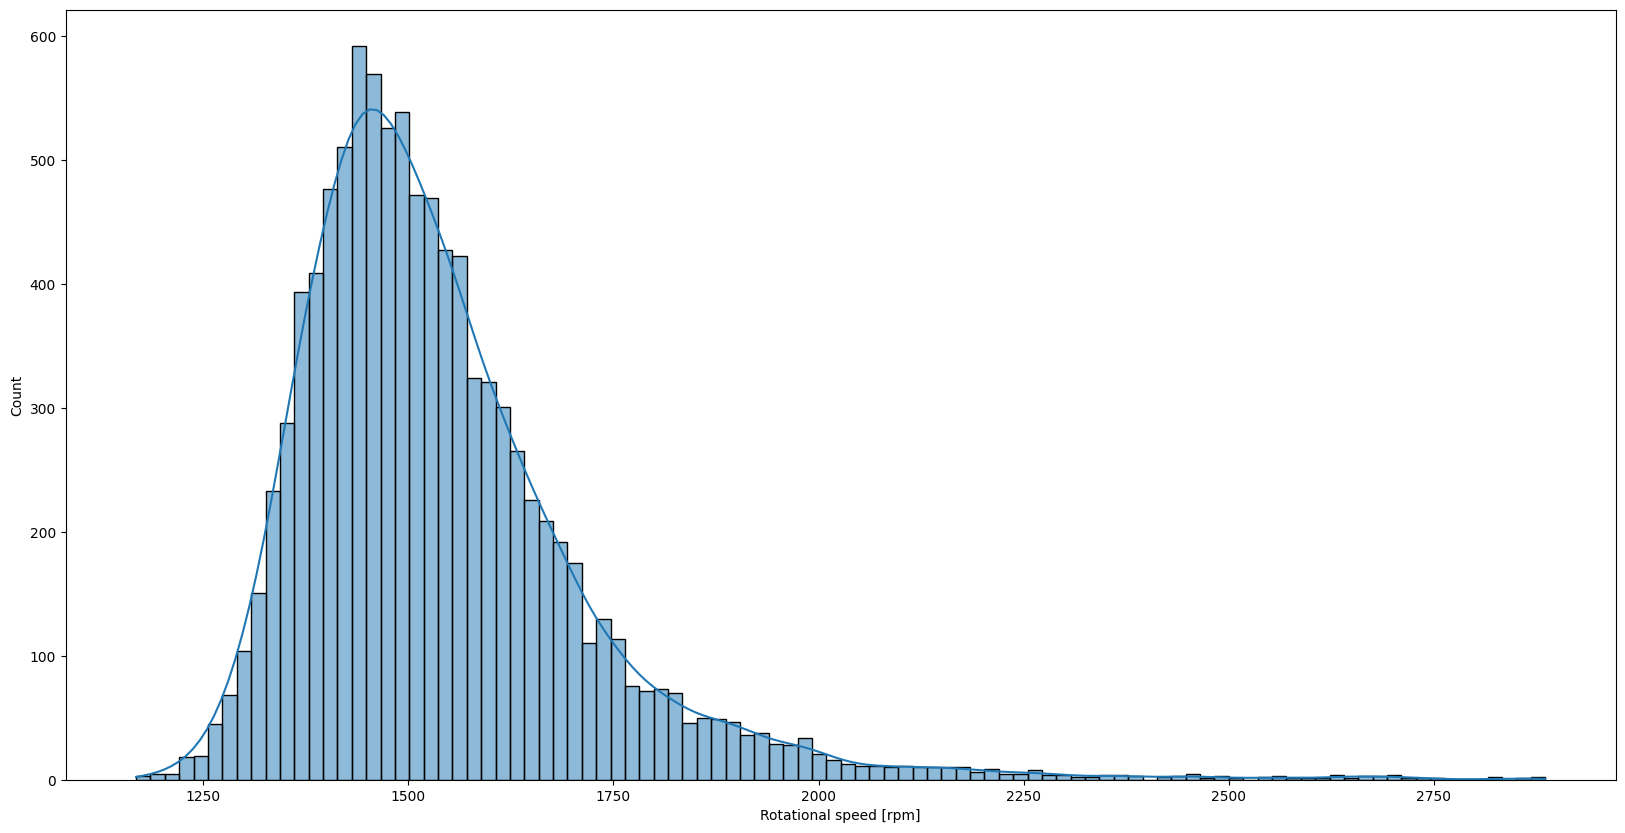

In [ ]:
sns.histplot(df['Rotational speed [rpm]'], kde=True)


most of the vehicle are moving with a rotational speed of 1500 ,This 1500 is called syncrous speed it is better to move vehicle with syncrous speed in order to improve the performnace

<Axes: ylabel='Torque [Nm]'>

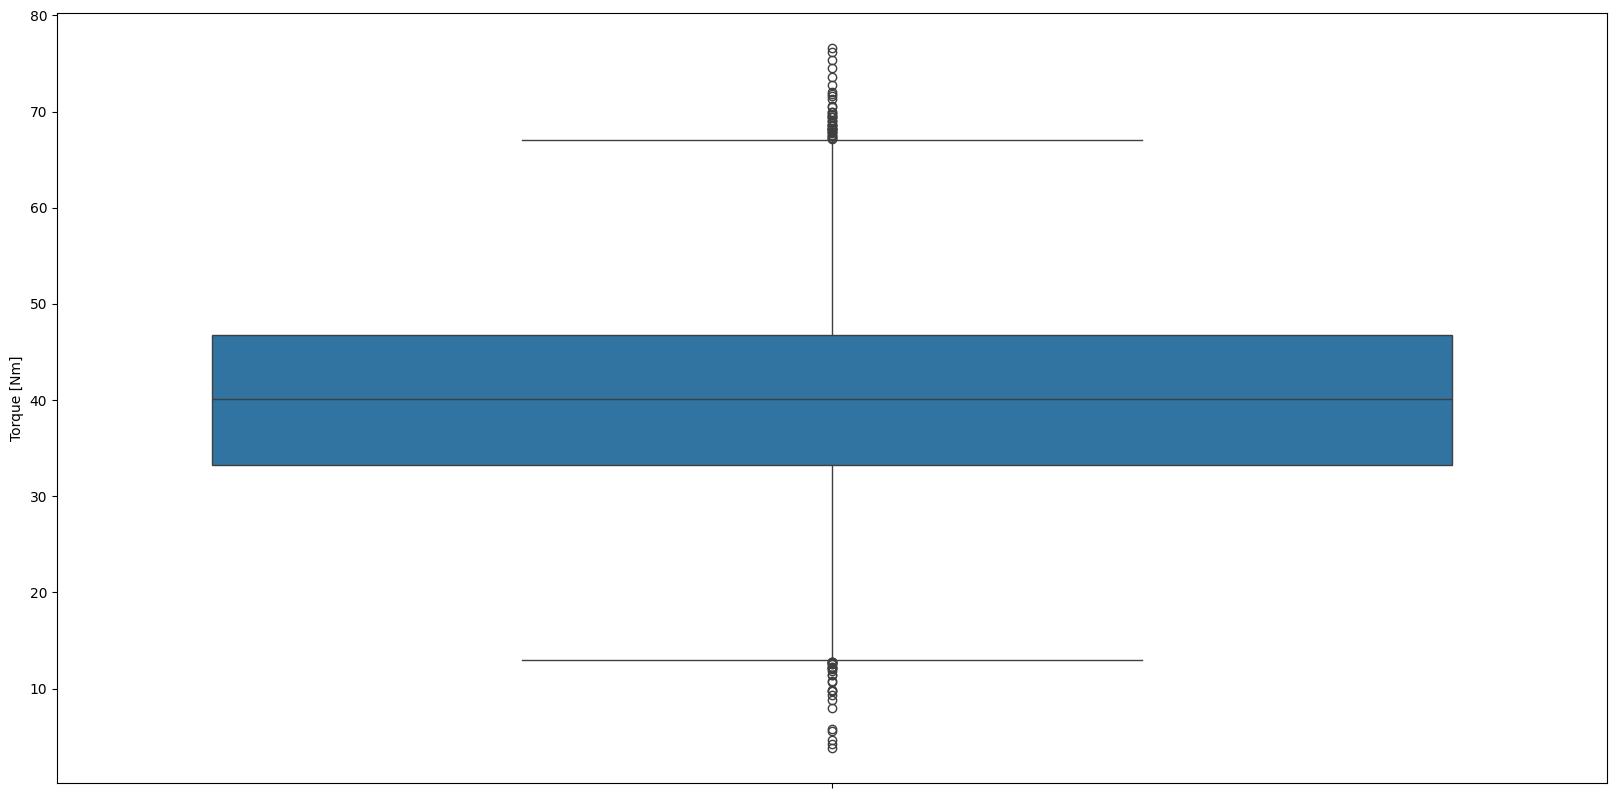

In [ ]:
sns.boxplot(df['Torque [Nm]'])

it shows Torque has the outliers, no problems if the outliers are present in Torue, beacause Torque helps for machines if it travells uphills

In [ ]:
pip install category_encoders


In [ ]:
df.drop('Product ID', axis = 1,inplace = True)


In [ ]:
df


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,1,298.1,308.6,1551,42.8,0,0,1
1,2,2,298.2,308.7,1408,46.3,3,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [ ]:
X = df.drop(columns="Failure Type" , axis=1)
y = df[["Failure Type"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:


# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Testing Accuracy:",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy    : 96.79 %
Testing Accuracy: 96.35 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       1.00      0.32      0.48        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.33      0.22      0.24      2000
weighted avg       0.94      0.96      0.95      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1921,    0,    0,    0,    0,    0],
       [  13,    6,    0,    0,    0,    0],
       [   9,    0,    0,    0,    0,    0],
       [  16,    0,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [  31,    0,    0,    1,    0,    0]])

In [ ]:
#applying decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[Text(0.5064144736842106, 0.9615384615384616, 'x[7] <= 0.5\ngini = 0.066\nsamples = 8000\nvalue = [7731, 76, 36, 62, 15, 80]'),
 Text(0.3226973684210526, 0.8846153846153846, 'x[5] <= 57.45\ngini = 0.004\nsamples = 7738\nvalue = [7723, 0, 0, 0, 15, 0]'),
 Text(0.2348684210526316, 0.8076923076923077, 'x[1] <= 2.5\ngini = 0.003\nsamples = 7522\nvalue = [7510, 0, 0, 0, 12, 0]'),
 Text(0.14868421052631578, 0.7307692307692307, 'x[0] <= 3066.5\ngini = 0.002\nsamples = 6759\nvalue = [6751, 0, 0, 0, 8, 0]'),
 Text(0.06578947368421052, 0.6538461538461539, 'x[0] <= 3065.5\ngini = 0.005\nsamples = 2085\nvalue = [2080, 0, 0, 0, 5, 0]'),
 Text(0.05526315789473684, 0.5769230769230769, 'x[6] <= 131.5\ngini = 0.004\nsamples = 2084\nvalue = [2080, 0, 0, 0, 4, 0]'),
 Text(0.04473684210526316, 0.5, 'gini = 0.0\nsamples = 1278\nvalue = [1278, 0, 0, 0, 0, 0]'),
 Text(0.06578947368421052, 0.5, 'x[6] <= 132.5\ngini = 0.01\nsamples = 806\nvalue = [802, 0, 0, 0, 4, 0]'),
 Text(0.031578947368421054, 0.4230769230

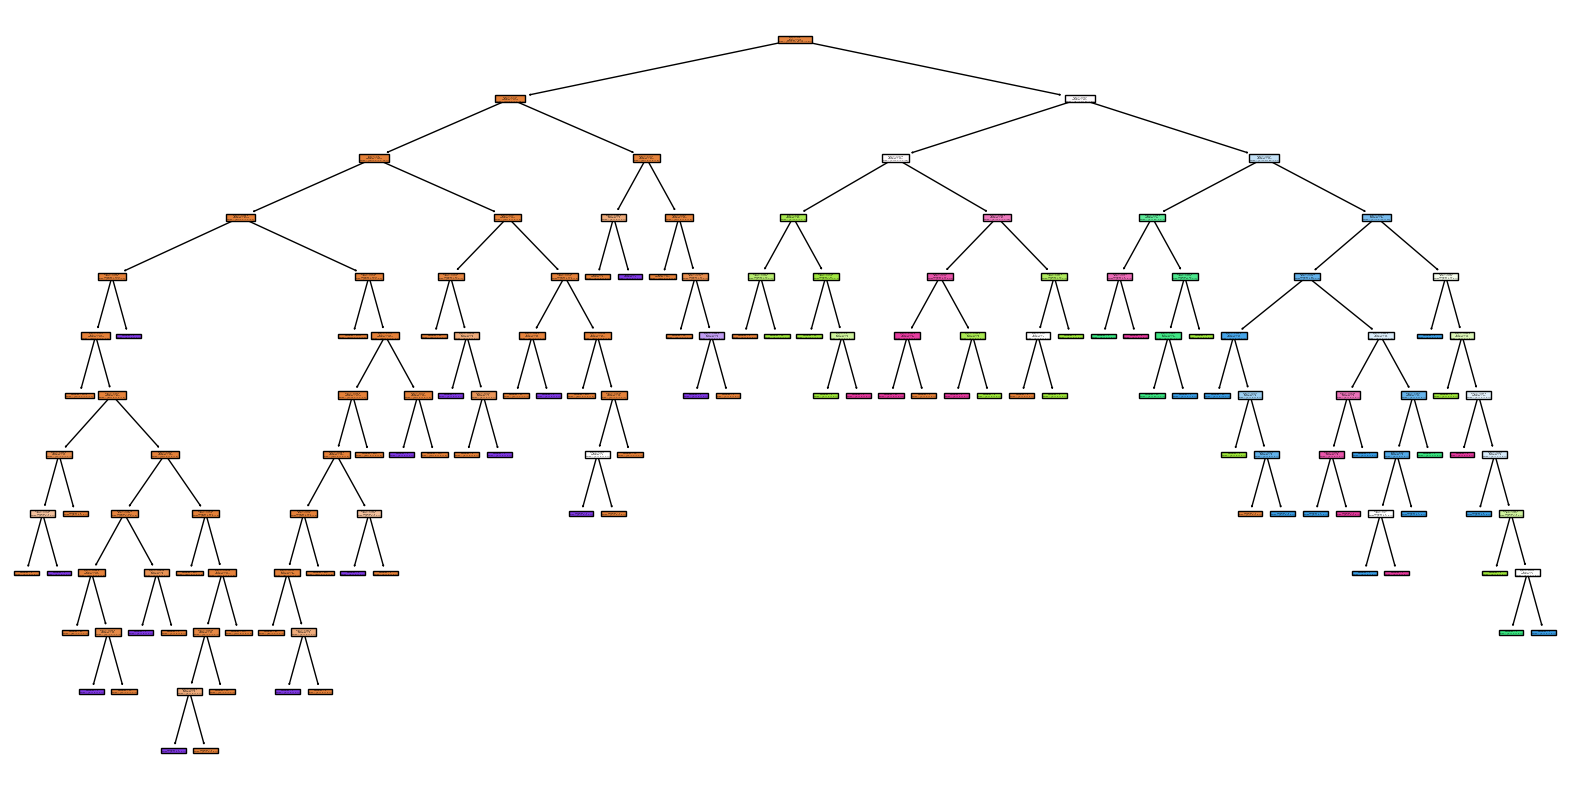

In [ ]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
plot_tree(dt,filled=True)

In [ ]:
#applying classification _report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.83      1.00      0.90        19
           2       0.89      0.89      0.89         9
           3       1.00      0.75      0.86        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9955

In [ ]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
svc=SVC()
lr=LogisticRegression()

In [ ]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.993

In [ ]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9605

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9635

In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with default hyperparameters: 0.9605


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with rbf kernel and C=100.0 : 0.9620


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with rbf kernel and C=1000.0 : 0.9690


In [ ]:
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=1.0 : 0.9950


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=100.0 : 0.9940


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=1000.0 : 0.9940


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with sigmoid kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with sigmoid kernel and C=100.0 : 0.9545


In [ ]:
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score



kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

In [ ]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

y_pred
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9955


# ***Results and conclusions***
    - In this i applied differnt machine learning alogorithms on this dataset
      while applying logistic regression i got accuracy score is 0.9635 and in case of random forest i got accuracy score is 0.996 GradientBoostingClassifier accuracy score is 0.993
      support vector classifier   accuracy score is 0.9605 and
      support vector machine  accuracy score is 0.9605
      navi bayes accuracy score is  0.9955
    2) Training Accuracy    : 96.79 % and Testing Accuracy: 96.35 % traing and
       testing accuracy is same because of small dataset
    3) The confusion matrix and classification report yields very good
       model performance.
    
